#### XIE Franck / ZODROS Mickael / IBRAHIM Yassine

# Projet : Générateur de nombres pseudo-aléatoire à partir d'un billard de Sinaï
--------

## Introduction 

Le billard de Sinaï, aussi appelé le gaz de Lorentz, est un système chaotique découvert par Iakov Sinaï. Il est composé d’un carré avec un obstacle circulaire situé à son centre.

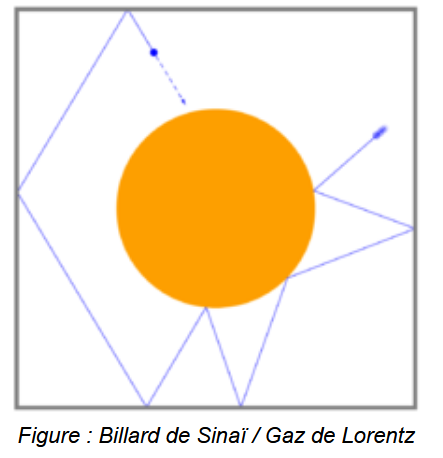

C'est donc le caractère chaotique du système qui va nous intéresser : en effet le système est très sensible à ses conditions initiales. Pour deux conditions initiales très proches, on obtiendra deux résultats très différents.

On appelle un générateur de nombres pseudo-aléatoires, un algorithme qui génère une séquence de nombres présentant certaines propriétés du hasard. 
Il est alors intéressant de se demander si il est possible d'exploiter la caractéristique chaotique du billard de Sinaï et de s'en inspirer afin de créer un générateur de nombres pseudo-aléatoire.

Dans un premier temps, on  fera une description du comportement physique du phénomène. Puis, on essaiera de s'en inspirer afin de composer un algorithme permettant de générer des séquences de nombres pseudo-aléatoire.

Ce projet est très grandement inspiré de l'article _A Pseudo Random Number Generator Based on Chaotic Billiards_, écrit par Khalid Charif, Ahmed Drissi et Zine El Abidine Guennoun, et a pour vocation de le reproduire à un niveau plus modeste. Les équations physiques ainsi que la ligne directrice générale de l'étude ont été reproduites dans ce projet.


## Description des équations de base et de la physique

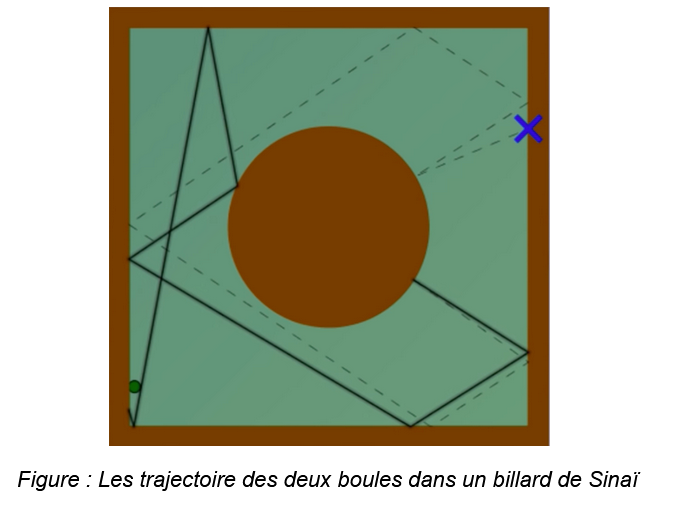

Tout d’abord, comme on l’a énoncé dans l’introduction, le billard de Sinaï est un système chaotique, c’est-à-dire que le système dépend des conditions initiales. Par exemple, on tire une première boule avec un certain angle, puis on tire une seconde boule avec un angle assez proche, on obtient deux trajectoires différentes.


Alors que pour un système dynamique, dont un billard classique, si les deux boules ont deux angles légèrement différents, alors on obtient des trajectoires quasi similaires. 

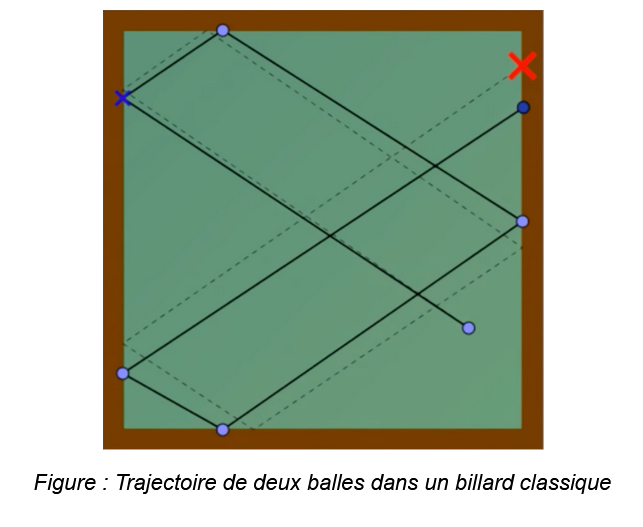

On considère un carré de côté $2a$, avec un obstacle circulaire placé au centre de rayon $r < a$. On se place dans le plan orthonormé  $(O, \overrightarrow{i},\overrightarrow{j})$.

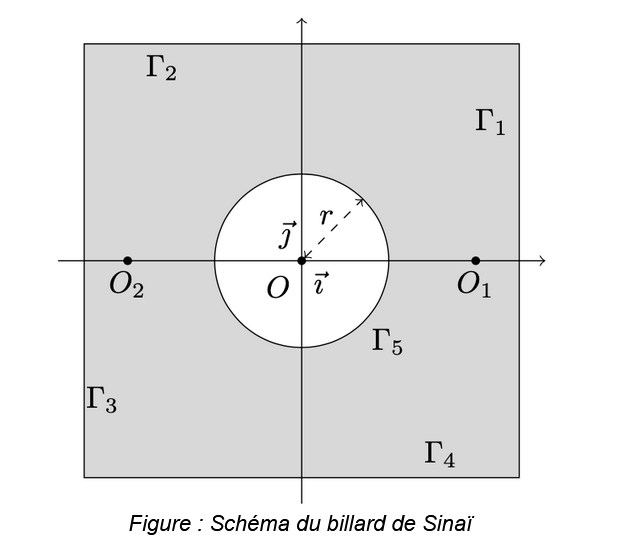

Une particule traverse l'espace à la vitesse $v$. On considère les bords $\Gamma_i$ (qui représentent des ensembles de points réguliers) contre lesquelles la particule va rebondir. A chaque point régulier, il y a un vecteur normal interne $\overrightarrow{N}$ que l'on considèrera à chaque collision entre la particule et les bords. Par ailleurs, chaque collision est élastique.

La particule est lancée à un angle initial $\theta_0$, tel que sa vitesse initiale vaut $\overrightarrow{v_0} = cos(\theta_0)\overrightarrow{i} + sin(\theta_0)\overrightarrow{j}$. A la $(n+1)^{ème}$ collision, on a, d'après les équations pour un choc élastique :

$\theta_{n+1} = \theta_n + 2 \overline{(\overrightarrow{v_n}, \overrightarrow{N_{n+1}})} + \pi \,\,\, mod \, 2\pi$

avec 

$\overrightarrow{v_n} = cos(\theta_n)\overrightarrow{i} + sin(\theta_n)\overrightarrow{j}$

et 

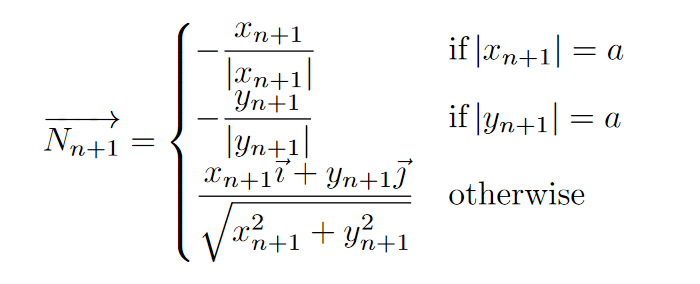

On va alors définir la fonction de transition $f$ d'un point $(x_n, y_n, \theta_n)$ au point $(x_{n+1}, y_{n+1}, \theta_{n+1})$ à l'aide des équations de mouvement. Cette fonction $f$ sera cruciale lors de l'écriture de notre algorithme.

L'équation de mouvement de la particule entre deux collisions s'écrit :

$ (D_n) \,\,\,\,\,\, sin(\theta_n)x - cos(\theta_n)y - sin(\theta_n)x_n + cos(\theta_n)y_n = 0 $

----

L'écriture de $f$ diffère en fonction de l'angle initial $\theta_n$, on séparera alors plusieurs cas distincts :

__Premier cas général :__


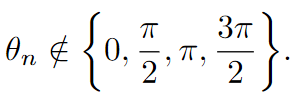

On pose les fonctions :

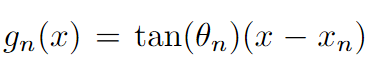

et 


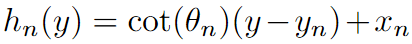

La distance entre $O$ et $D_n$ s'écrit : 


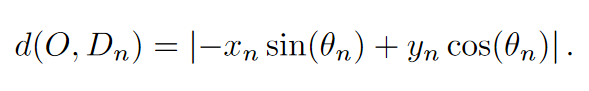

- Dans le cas où $(x_{n+1},y_{n+1},\theta_{n+1})$ appartient au cercle $\Gamma_5$ et à $D_n$, on a le système :

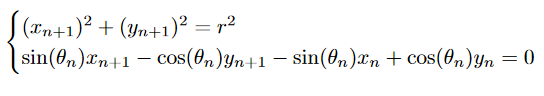

dont on déduit le déterminant : 
    
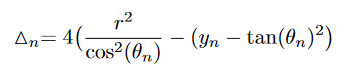

et on obtient :


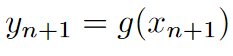

quant à $x_{n+1}$, il dépend de la valeur de $\theta_n$ :

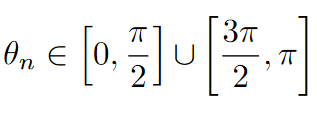

on a : 

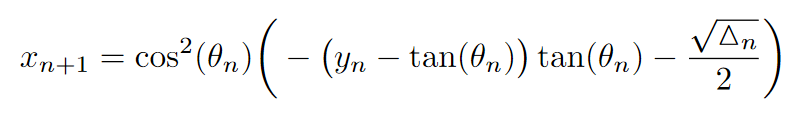

Sinon, pour :


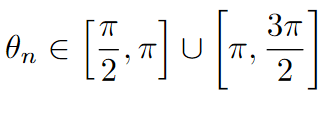

on a : 
    

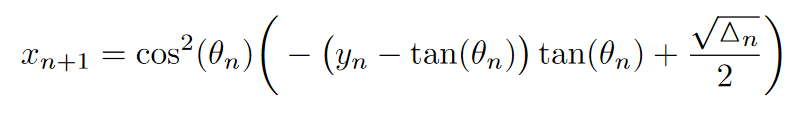

- Dans le cas où $(x_{n+1},y_{n+1},\theta_{n+1})$ appartient à n'importe quel bord $\Gamma_i$ sauf le cercle et à $D_n$, et on a pour 

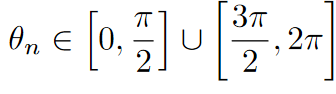

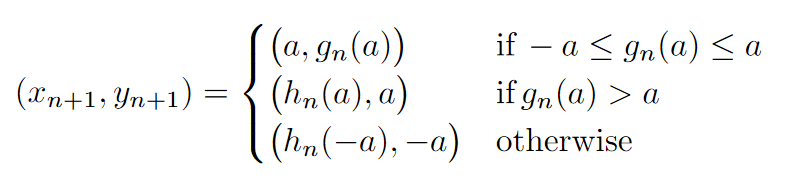

et pour 

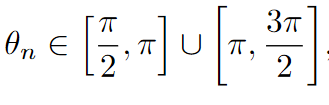

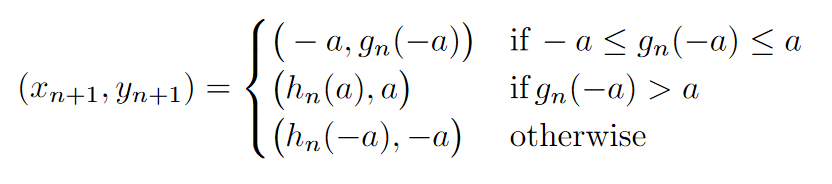

__Deuxième cas général__ :

Si


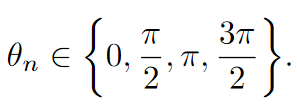

- Pour 

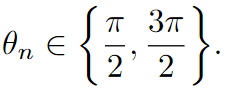

On a 

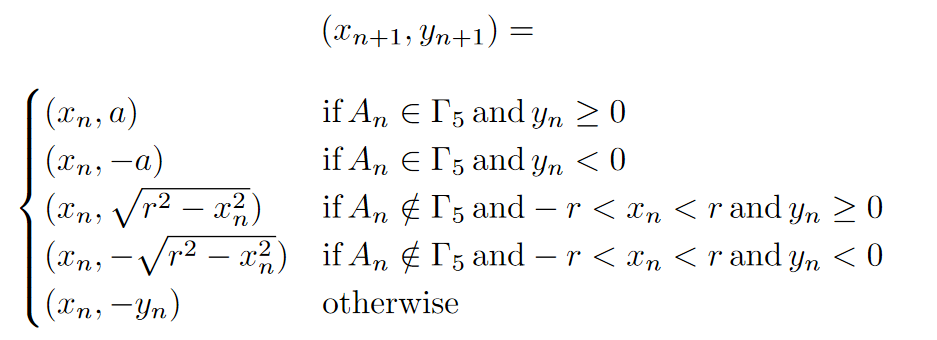

- Pour 

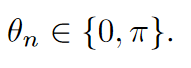

On a 

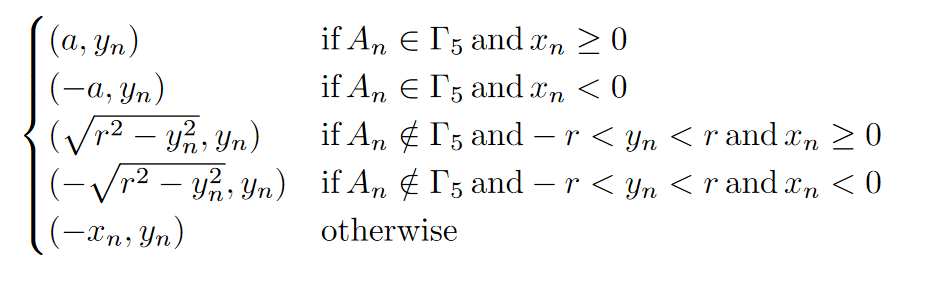

----

Notons que le caractère chaotique du billard peut être mis en évidence par l’exposant de Lyapunov $\lambda$. Un exposant positif est significatif de chaos et d'une grande sensibilité aux conditions initiales. Il a été montré dans l'étude _The lyapunov exponent in the sinai billiard in the small scatterer limit_ par Per Dahlqvist que l'exposant $\lambda$ est positif pour toute valeur $r$ de rayon du disque. 


L'algorithme de notre générateur de nombres pseudo-aléatoire consiste en une simulation de ce billard de Sinai. On va simuler le mouvement de deux particules indépendantes dans l'espace à vélocité constante. On va déterminer les angles initiaux de ces deux particules à partir d'un mot de passe $Pw$ de taille arbitraire $L$. On cherchera alors à générer une séquence binaire pseudo-aléatoire $RS$, sécurisée.

## Ecriture de l'algorithme et résultat

A partir d'un mot de passe $Pw = (p_{L−1} . . . p_2p_1p_0)_2$ qu'on aura converti au préalable sous forme d'une séquence binaire de taille $L$, on calcule les angles initiaux $\theta_1$ et $\theta_2$. Pour chaque angle, on doit extraire 64 bits de $Pw$, à l'aide d'un pointeur $pt$ qui récupère les positions des bits dans $Pw$.

In [1]:
#importation des modules
import math as m
import numpy as np

def conv(a):
    "renvoie une chaine de caractère sous forme d'une séquence binaire"
    return [bin(int(i)) for i in str(a)]

In [2]:
#calcul de theta1 et theta2

Pw=conv(input("Mot de passe : "))
#print(Pw)
#print(type(bin(~int(Pw[0],2))))
pt=1
I01=int(Pw[len(Pw)-2],2)
I02=int(Pw[1],2)
for i in range(1,64):
    pt=((int(len(Pw)/2)+1)*pt+1)%(len(Pw))
    if i%2==0:
        I01+=(~int(Pw[pt],2))*2**i
        I02+=int(Pw[len(Pw)-1-pt],2)*2**i
    else:
        I01+=int(Pw[pt],2)*2**i
        I02+=~int(Pw[len(Pw)-1-pt],2)*2**i
theta1=(2*np.pi*I01/(2**64))%(2*np.pi)
theta2=(2*np.pi*I02/(2**64))%(2*np.pi)
#print(theta1,theta2)

Mot de passe : 12345677


Une fois les deux angles initiaux calculés, on passe à l'écriture du générateur : on fait circuler les deux particules jusqu'à la $e^{ème}$ collision, avec $e$ un nombre déterminé à partir des 8 derniers bits du mot de passe $Pw$.

Une fois cela fait, on initialise un pas $i  \geq 1$. A chaque pas, on réalise $(n_i+1)$ collisions pour les deux particules, avec $n_i$ le nombre déterminé par les deux bits issus du mot de passe $Pw$, tel que $n_i = 2*p_{j+1} + p_j$, avec $ j = 2 * i \, mod(L-1)$

Après $(n_i+1)$ collisions, on obtient de nouvelles coordonnées. Néanmoins, on ne s'intéresse qu'aux coordonnées d'une collision avec un des bords du billard. On ignore le cercle, et si jamais une des deux particules s'y situent, on regarde la prochaine collision avec un des bords. 

Les coordonnées de la collision obtenues, on génère deux valeurs propres telles que : 

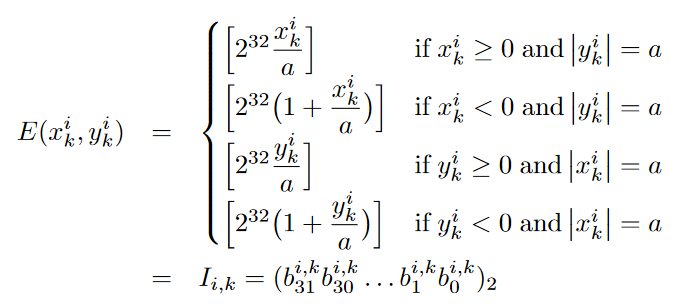

On obtient donc deux valeurs $I_{i,1}$ et $I_{i,2}$, qu'on compare bit par bit à l'aide de l'opérateur XOR (ou exclusif). On convertit le résultat de cette comparaison sous forme binaire, et on le concatène à notre séquence $RS$.

Dans l'écriture de notre algorithme, il est possible de laisser au choix la taille de la séquence binaire finale obtenue, en limitant à notre guise le nombre de pas, soit le nombre de fois qu'on réalise $(n_i +1)$ collisions. On prendra le rayon du cercle $r$ tel que $r = \frac{a}{2}$ .

In [3]:
#Conditions initiales
a=5   #côté du carré
r=a/2 #rayon du cercle

In [4]:
#détermination du nouvel angle après collision
def theta_nouv(theta, xnouv, ynouv):
    "renvoie le nouvel angle theta_n+1 à partir de l'ancien angle theta et des nouvelles positions x et y"
    if abs(xnouv)==a:
        theta_n1 = theta + 2 * (np.cos(theta)*(-xnouv/abs(xnouv)))/(xnouv/abs(xnouv)) + m.pi
        return theta_n1%(2*m.pi)
    if abs(ynouv)==a:
        theta_n1 = theta + 2 * (np.sin(theta)*(-ynouv/abs(ynouv)))/(ynouv/abs(ynouv)) + m.pi
        return theta_n1%(2*m.pi)
    else:
        ps = np.cos(theta)*xnouv/(np.sqrt(xnouv**2 + ynouv**2))
        ps_2 = np.sin(theta)*ynouv/(np.sqrt(xnouv**2 + ynouv**2))
        norme = np.sqrt((xnouv/(np.sqrt(xnouv**2 + ynouv**2)))**2 + (ynouv/(np.sqrt(xnouv**2 + ynouv**2)))**2)
        theta_n1 = theta + ((ps + ps_2)/norme) + m.pi
        return theta_n1%(2*m.pi)

In [5]:
#création de la fonction de transition 

def f(x,y,theta):
    "renvoie x_n+1, y_n+1 et theta_n+1"
    
    #if  x < -a or x > a or y < -a or y > a :           # debug 
       #print("x ou y trop grand")
    if theta in [0,np.pi/2,m.pi,3*m.pi/2]:
        
        if theta in [m.pi/2,3*m.pi/2]:
            
            if (x**2 + y**2 == r**2) and y>=0:
                return x,a,theta_nouv(theta,x,a)
            elif (x**2 + y**2 == r**2) and y<0:
                return x,-a,theta_nouv(theta,x,-a)
            elif (x**2 + y**2) != r**2 and -r < x < r and y>=0:
                return x, np.sqrt((r**2)-x**2), theta_nouv(theta,x,np.sqrt((r**2)-x**2))
            elif (x**2 + y**2) != r**2 and -r < x < r and y<0:
                return x, -np.sqrt((r**2)-x**2), theta_nouv(theta,x,-np.sqrt((r**2)-x**2))
            else:
                return x,-y,theta_nouv(theta,x,-y)
            
        if theta in [0,m.pi]:
            
            if (x**2 + y**2 == r**2) and x>=0:
                return a,y,theta_nouv(theta,a,y)
            elif (x**2 + y**2 == r**2) and x<0:
                return -a,y,theta_nouv(theta,-a,y)
            elif (x**2 + y**2) != r**2 and -r < y < r and x>=0:
                return np.sqrt((r**2)-y**2), y, theta_nouv(theta,np.sqrt((r**2)-y**2),y)
            elif (x**2 + y**2) != r**2 and -r < y < r and x<0:
                return -np.sqrt((r**2)-y**2), y, theta_nouv(theta,-np.sqrt((r**2)-y**2),y)
            else:
                return -x,y,theta_nouv(theta,-x,y)
    
    elif theta not in [0,m.pi/2,m.pi,3*m.pi/2]:
        
        if abs(-x*np.sin(theta) + y*np.cos(theta) ) <= r and (x**2 + y**2) != r**2:
            
            det = 4 * (((r**2)/(np.cos(theta)**2)) - (y - np.tan(theta)**2))
            
            if 0 < theta < m.pi/2 or 3*m.pi/2 < theta < 2*m.pi:
                
                nouv_x = (np.cos(theta)**2)*(-(y-np.tan(theta))*np.tan(theta) - np.sqrt(det)/2)
                nouv_y = np.tan(theta)*(nouv_x-x) + y
                #nouv_y = r/nouv_x                                        # debug 
                
                return nouv_x, nouv_y, theta_nouv(theta,nouv_x,nouv_y)
            
            elif m.pi/2 < theta < m.pi or m.pi < theta < 3*m.pi/2:
                
                nouv_x = (np.cos(theta)**2)*(-(y-np.tan(theta))*np.tan(theta) + np.sqrt(det)/2)
                nouv_y = (np.tan(theta)*(nouv_x-x) + y)
                #nouv_y = r/nouv_x
                return nouv_x, nouv_y, theta_nouv(theta,nouv_x,nouv_y)
        
        elif abs(-x*np.sin(theta)+y*np.cos(theta)) > r or (x**2 + y**2)==r**2:
                          
            if 0 < theta < m.pi/2 or 3*m.pi/2 < theta < 2*m.pi:
                          
                if -a <= (np.tan(theta)*(a-x) + y) <= a :
                    
                    return a,(np.tan(theta)*(a-x) + y),theta_nouv(theta,a,(np.tan(theta)*(a-x) + y))
                
                elif (np.tan(theta)*(a-x) + y) > a :
                    
                    return (1/np.tan(theta))*(a-y) + x, a, theta_nouv(theta,(1/np.tan(theta))*(a-y) + x,a)
                
                else:
                          
                    return (1/np.tan(theta))*(-a-y) + x, -a, theta_nouv(theta,(1/np.tan(theta))*(-a-y) + x, -a)
        
            elif m.pi/2 < theta < m.pi or m.pi < theta < 3*m.pi/2:
                
                if -a <= (np.tan(theta)*(-a-x) + y) <= a :
                    
                    return -a, (np.tan(theta)*(-a-x) + y), theta_nouv(theta,-a, (np.tan(theta)*(-a-x) + y))
                
                elif (np.tan(theta)*(-a-x) + y) > a :
                          
                    return (1/np.tan(theta))*(a-y) + x, a, theta_nouv(theta,(1/np.tan(theta))*(a-y) + x,a)
                
                else:
                    
                    return (1/np.tan(theta))*(-a-y) + x, -a, theta_nouv(theta,(1/np.tan(theta))*(-a-y) + x,-a)

Dans le programme se trouve quelques commentaires "debug", utilisés pour mettre en évidence certaines incohérences dans l'exécution de l'algorithme suivant.

In [6]:
def gen(x,y):
    I=0
    if x>=0 and abs(y)==a:
        I+=int((x*2**(32))/a)
    elif x<0 and abs(y)==a:
        I+=int((1+(x/a))*2**32)
    elif y>=0 and abs(x)==a:
        I+=int((y*2**(32))/a)
    elif y<0 and abs(x)==a:
        I+=int((1+(y/a))*2**32)
    #else:
        #print("Erreur : conditions de x et y non satisfaites pour le gen")     #debug
    return abs(I)

In [7]:
N=input("Longueur de la séquence binaire voulue :")
RS=''
L=len(Pw)
x1,y1 = 0,a/2
x2,y2 = 0,-a/2
e=int(Pw[-1],2)
#compteur1=0             #debug
#compteur2=0
for i in range(len(Pw)-8,len(Pw)-1):
    e+=int(Pw[i],2)*(2**i)
for i in range(1,e+1):
    x1,y1,theta1 = f(x1,y1,theta1)
    #compteur1+=1
    #print("compteur 1=",compteur1)
    x2,y2,theta2 = f(x2,y2,theta2)
    #compteur2+=1
    #print("compteur 2=",compteur2)
I01 = int(Pw[-2],2)
I02 = int(Pw[1],2)
compteur_i = len(Pw)-2
compteur_j = 2*compteur_i%(L-1)
n = 2*int(Pw[compteur_j-1],2) + int(Pw[compteur_j],2)
l = 0
while l < m.floor(int(N)/32) :
    for i in range(1,n+2):
        x1,y1,theta1 = f(x1,y1,theta1)
        x2,y2,theta2 = f(x2,y2,theta2)
    if (x1)**2 + (y1)**2 == r**2:
        x1,y1,theta1 = f(x1,y1,theta1)
    if (x2)**2 + (y2)**2 == r**2:
        x2,y2,theta2 = f(x2,y2,theta2)
    #print("x1,y1,theta1=",x1,y1, theta1)
    #print("x2,y2,theta2=",x2,y2, theta2)
    I1 = gen(x1,y1)
    I2 = gen(x2,y2)
    #print(I1,I2)
    comp = bin(I1^I2)[2:]
    RS += comp
    l+=1
    compteur_i-=1
    compteur_j=2*compteur_i%(L-1)

print("Séquence binaire pseudo-aléatoire :", RS)
print("Longueur de la séquence :",len(RS))

Longueur de la séquence binaire voulue :128
Séquence binaire pseudo-aléatoire : 10111001011010001101110010101110100011111111001010101001010111000111100100111100001011101100110100010001011111010000100001110
Longueur de la séquence : 125


L'algorithme semble aux premiers abords bien renvoyer une séquence binaire, et elle semble plutôt aléatoire. Mais un problème déjà flagrant est présent : la longueur de la séquence en sortie n'est pas exactement la même que celle qu'on a demandé en entrée. De plus, pour certaines valeurs en entrée, on obtient une séquence en sortie de taille complètement différente. Ce problème en révèle d'autres sous-jacents, liés à l'écriture de la fonction de transition.

En effet, en décommentant les nombreux commentaires "debug" dans le programme, il est possible de mettre évidence certains problèmes : la fonction de transition renvoie des valeurs de $x_{n+1}$ et $y_{n+1}$ parfois bien en dehors de l'intervalle $[-a:a]$. Dans l'algorithme, à l'aide de quelques fonctions `print` et de compteurs, on peut montrer qu'il s'agit la plupart du temps de la sous boucle :

`elif theta not in [0,m.pi/2,m.pi,3*m.pi/2]:`
   
  $\,\,\,\,$ `if abs(-x*np.sin(theta) + y*np.cos(theta) ) <= r and (x**2 + y**2) != r**2:`
  
Les résultats des formules de $x_{n+1}$ et $y_{n+1}$ dans ce cas là sont plutôt étranges. Il faudrait certainement reprendre les calculs théoriques de la partie physique.

Ce problème semble en causer un autre dans la boucle `while` de l'algorithme, lorsqu'il s'agit de générer les deux nombres $I_{i,1}$ et $I_{i,2}$ : il arrive un moment où l'obtient des coordonnées de $x_k$ et $y_k$ qui ne semblent pas indiquer qu'une des particules soit sur la cercle, mais ne semblent pas indiquer une collision sur un bord non plus. La fonction permettant de générer $I_{i,k}$ renvoie un 0 dans ce cas là.

## Conclusion

Malgré les aléas encontrés lors du codage de l'algorithme, il est toujours possible de tirer une conclusion de notre étude, en testant les séquences binaires qu'on peut obtenir à l'aide de notre algorithme. Il existe certains tests statistiques qui permettent de jauger le caractère aléatoire d'une séquence binaire. La NIST Statistical Test Suite par exemple en recense plusieurs. On a choisi de prendre ici le _Random Excursion test_ :

In [8]:
from math import isnan as isnan
from numpy import abs as abs
from numpy import append as append
from numpy import array as array
from numpy import clip as clip
from numpy import cumsum as cumsum
from numpy import ones as ones
from numpy import sqrt as sqrt
from numpy import sum as sum
from numpy import transpose as transpose
from numpy import where as where
from numpy import zeros as zeros
from scipy.special import erfc as erfc
from scipy.special import gammaincc as gammaincc

class RandomExcursions:

    @staticmethod
    def random_excursions_test(binary_data:str, verbose=False, state=1):
        """
        from the NIST documentation http://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf

        The focus of this test is the total number of times that a particular state is visited (i.e., occurs) in a
        cumulative sum random walk. The purpose of this test is to detect deviations from the expected number
        of visits to various states in the random walk. This test is actually a series of eighteen tests (and
        conclusions), one test and conclusion for each of the states: -9, -8, …, -1 and +1, +2, …, +9.

        :param      binary_data:    a binary string
        :param      verbose         True to display the debug messgae, False to turn off debug message
        :return:    (p_value, bool) A tuple which contain the p_value and result of frequency_test(True or False)
        """

        length_of_binary_data = len(binary_data)
        # Form the normalized (-1, +1) sequence X in which the zeros and ones of the input sequence (ε)
        # are converted to values of –1 and +1 via X = X1, X2, … , Xn, where Xi = 2εi – 1.
        sequence_x = zeros(length_of_binary_data)
        for i in range(len(binary_data)):
            if binary_data[i] == '0':
                sequence_x[i] = -1.0
            else:
                sequence_x[i] = 1.0

        # Compute partial sums Si of successively larger subsequences, each starting with x1. Form the set S
        cumulative_sum = cumsum(sequence_x)

        # Form a new sequence S' by attaching zeros before and after the set S. That is, S' = 0, s1, s2, … , sn, 0.
        cumulative_sum = append(cumulative_sum, [0])
        cumulative_sum = append([0], cumulative_sum)

        # These are the states we are going to look at
        x_values = array([-4, -3, -2, -1, 1, 2, 3, 4])
        index = x_values.tolist().index(state)

        # Identify all the locations where the cumulative sum revisits 0
        position = where(cumulative_sum == 0)[0]
        # For this identify all the cycles
        cycles = []
        for pos in range(len(position) - 1):
            # Add this cycle to the list of cycles
            cycles.append(cumulative_sum[position[pos]:position[pos + 1] + 1])
        num_cycles = len(cycles)

        state_count = []
        for cycle in cycles:
            # Determine the number of times each cycle visits each state
            state_count.append(([len(where(cycle == state)[0]) for state in x_values]))
        state_count = transpose(clip(state_count, 0, 5))

        su = []
        for cycle in range(6):
            su.append([(sct == cycle).sum() for sct in state_count])
        su = transpose(su)

        pi = ([([RandomExcursions.get_pi_value(uu, state) for uu in range(6)]) for state in x_values])
        inner_term = num_cycles * array(pi)
        xObs = sum(1.0 * (array(su) - inner_term) ** 2 / inner_term, axis=1)
        p_values = ([gammaincc(2.5, cs / 2.0) for cs in xObs])

        if verbose:
            print('Random Excursion Test DEBUG BEGIN:')
            print("\tLength of input:\t", length_of_binary_data)
            count = 0
            print('\t\t STATE \t\t\t xObs \t\t\t\t\t\t p_value  \t\t\t\t\t Result')
            for item in p_values:
                print('\t\t', repr(x_values[count]).rjust(2), ' \t\t ', xObs[count],' \t\t ', repr(item).rjust(21), ' \t\t\t ', (item >= 0.01))
                count += 1
            print('DEBUG END.')

        states = ['-4', '-3', '-2', '-1', '+1', '+2', '+3', '+4',]
        result = []
        count = 0
        for item in p_values:
            result.append((states[count], x_values[count], xObs[count], item, (item >= 0.01)))
            count += 1

        return result

    @staticmethod
    def variant_test(binary_data:str, verbose=False):
        """
        from the NIST documentation http://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf

        :param binary_data:
        :param verbose:
        :return:
        """
        length_of_binary_data = len(binary_data)
        int_data = zeros(length_of_binary_data)

        for count in range(length_of_binary_data):
            int_data[count] = int(binary_data[count])

        sum_int = (2 * int_data) - ones(len(int_data))
        cumulative_sum = cumsum(sum_int)

        li_data = []
        index = []
        for count in sorted(set(cumulative_sum)):
            if abs(count) <= 9:
                index.append(count)
                li_data.append([count, len(where(cumulative_sum == count)[0])])

        j = RandomExcursions.get_frequency(li_data, 0) + 1

        p_values = []
        for count in (sorted(set(index))):
            if not count == 0:
                den = sqrt(2 * j * (4 * abs(count) - 2))
                p_values.append(erfc(abs(RandomExcursions.get_frequency(li_data, count) - j) / den))

        count = 0
        # Remove 0 from li_data so the number of element will be equal to p_values
        for data in li_data:
            if data[0] == 0:
                li_data.remove(data)
                index.remove(0)
                break
            count += 1

        if verbose:
            print('Random Excursion Variant Test DEBUG BEGIN:')
            print("\tLength of input:\t", length_of_binary_data)
            print('\tValue of j:\t\t', j)
            print('\tP-Values:')
            print('\t\t STATE \t\t COUNTS \t\t P-Value \t\t Conclusion')
            count = 0
            for item in p_values:
                print('\t\t', repr(li_data[count][0]).rjust(4), '\t\t', li_data[count][1], '\t\t', repr(item).ljust(14), '\t\t', (item >= 0.01))
                count += 1
            print('DEBUG END.')


        states = []
        for item in index:
            if item < 0:
                states.append(str(item))
            else:
                states.append('+' + str(item))

        result = []
        count = 0
        for item in p_values:
            result.append((states[count], li_data[count][0], li_data[count][1], item, (item >= 0.01)))
            count += 1

        return result

    @staticmethod
    def get_pi_value(k, x):
        """
        This method is used by the random_excursions method to get expected probabilities
        """
        if k == 0:
            out = 1 - 1.0 / (2 * abs(x))
        elif k >= 5:
            out = (1.0 / (2 * abs(x))) * (1 - 1.0 / (2 * abs(x))) ** 4
        else:
            out = (1.0 / (4 * x * x)) * (1 - 1.0 / (2 * abs(x))) ** (k - 1)
        return out

    @staticmethod
    def get_frequency(list_data, trigger):
        """
        This method is used by the random_excursions_variant method to get frequencies
        """
        frequency = 0
        for (x, y) in list_data:
            if x == trigger:
                frequency = y
        return frequency

def random_excursions_test(binary_data:str, verbose=False, state=1):
        """
        from the NIST documentation http://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf

        The focus of this test is the total number of times that a particular state is visited (i.e., occurs) in a
        cumulative sum random walk. The purpose of this test is to detect deviations from the expected number
        of visits to various states in the random walk. This test is actually a series of eighteen tests (and
        conclusions), one test and conclusion for each of the states: -9, -8, …, -1 and +1, +2, …, +9.

        :param      binary_data:    a binary string
        :param      verbose         True to display the debug messgae, False to turn off debug message
        :return:    (p_value, bool) A tuple which contain the p_value and result of frequency_test(True or False)
        """

        length_of_binary_data = len(binary_data)
        # Form the normalized (-1, +1) sequence X in which the zeros and ones of the input sequence (ε)
        # are converted to values of –1 and +1 via X = X1, X2, … , Xn, where Xi = 2εi – 1.
        sequence_x = zeros(length_of_binary_data)
        for i in range(len(binary_data)):
            if binary_data[i] == '0':
                sequence_x[i] = -1.0
            else:
                sequence_x[i] = 1.0

        # Compute partial sums Si of successively larger subsequences, each starting with x1. Form the set S
        cumulative_sum = cumsum(sequence_x)

        # Form a new sequence S' by attaching zeros before and after the set S. That is, S' = 0, s1, s2, … , sn, 0.
        cumulative_sum = append(cumulative_sum, [0])
        cumulative_sum = append([0], cumulative_sum)

        # These are the states we are going to look at
        x_values = array([-4, -3, -2, -1, 1, 2, 3, 4])
        index = x_values.tolist().index(state)

        # Identify all the locations where the cumulative sum revisits 0
        position = where(cumulative_sum == 0)[0]
        # For this identify all the cycles
        cycles = []
        for pos in range(len(position) - 1):
            # Add this cycle to the list of cycles
            cycles.append(cumulative_sum[position[pos]:position[pos + 1] + 1])
        num_cycles = len(cycles)

        state_count = []
        for cycle in cycles:
            # Determine the number of times each cycle visits each state
            state_count.append(([len(where(cycle == state)[0]) for state in x_values]))
        state_count = transpose(clip(state_count, 0, 5))

        su = []
        for cycle in range(6):
            su.append([(sct == cycle).sum() for sct in state_count])
        su = transpose(su)

        pi = ([([RandomExcursions.get_pi_value(uu, state) for uu in range(6)]) for state in x_values])
        inner_term = num_cycles * array(pi)
        xObs = sum(1.0 * (array(su) - inner_term) ** 2 / inner_term, axis=1)
        p_values = ([gammaincc(2.5, cs / 2.0) for cs in xObs])

        if verbose:
            print('Random Excursion Test DEBUG BEGIN:')
            print("\tLength of input:\t", length_of_binary_data)
            count = 0
            print('\t\t STATE \t\t\t xObs \t\t\t\t\t\t p_value  \t\t\t\t\t Result')
            for item in p_values:
                print('\t\t', repr(x_values[count]).rjust(2), ' \t\t ', xObs[count],' \t\t ', repr(item).rjust(21), ' \t\t\t ', (item >= 0.01))
                count += 1
            print('DEBUG END.')

        states = ['-4', '-3', '-2', '-1', '+1', '+2', '+3', '+4',]
        result = []
        count = 0
        for item in p_values:
            result.append((states[count], x_values[count], xObs[count], item, (item >= 0.01)))
            count += 1

        return result

In [9]:
random_excursions_test(RS)

[('-4', -4, 0.4285714285714286, 0.9945059778188691, True),
 ('-3', -3, 0.6, 0.9880032427940937, True),
 ('-2', -2, 1.0, 0.9625657732472964, True),
 ('-1', -1, 3.0, 0.6999858358786276, True),
 ('+1', 1, 11.666666666666666, 0.03965197599603161, True),
 ('+2', 2, 14.300411522633745, 0.013809664275726462, True),
 ('+3', 3, 18.827199999999998, 0.0020698948710056453, False),
 ('+4', 4, 3.0730251284187142, 0.6887284450698641, True)]

La fonction renvoie plusieurs tuple '(p_value, bool)', la $P_{value}$ étant un nombre calculé à partir de la séquence binaire, et est comparée à un seuil. Si elle est supérieur au seuil, alors le bool renvoie True, ce qui montre que la séquence peut être considérée comme aléatoire. La fonction réalise plusieurs tests pour plusieurs seuils. On remarque alors que pour la majorité, la séquence est considérée comme aléatoire, ce qui peut être considéré comme une réussite. Néanmoins, pour avoir une vraie idée sur la fiabilité de notre générateur, il faudrait faire le test sur un très grand échantillon de séquences binaires générées.

## Références

- A Pseudo Random Number Generator Based on Chaotic Billiards
De : Khalid Charif, Ahmed Drissi, Zine El Abidine Guennoun
(http://ijns.jalaxy.com.tw/contents/ijns-v19-n3/ijns-2017-v19-n3-p479-486.pdf)

- NIST Randomness Test suite
(https://github.com/stevenang/randomness_testsuite)

- Billard de Sinai, Wikipédia
(https://fr.wikipedia.org/wiki/Billard_de_Sina%C3%AF)